In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import os

full_data = pd.DataFrame()

for file in os.listdir('./Sales_Data/'):
    df = pd.read_csv('./Sales_Data/'+file)
    full_data = pd.concat([full_data,df])



In [175]:
full_data.isna().mean() * 100

Order ID            0.291678
Product             0.291678
Quantity Ordered    0.291678
Price Each          0.291678
Order Date          0.291678
Purchase Address    0.291678
dtype: float64

In [176]:
full_data = full_data.dropna()

print(full_data.shape)

full_data = full_data.drop(full_data[full_data['Order Date'] == 'Order Date'].index)

full_data['Order Date'] = pd.to_datetime(full_data['Order Date'])
full_data['Quantity Ordered'] = pd.to_numeric(full_data['Quantity Ordered'])
full_data['Price Each'] = pd.to_numeric(full_data['Price Each'])

full_data['Order Day'] = full_data['Order Date'].dt.day
full_data['Order Month'] = full_data['Order Date'].dt.month
full_data['Order Year'] = full_data['Order Date'].dt.year

full_data['Total Value'] = full_data['Quantity Ordered'] * full_data['Price Each']

full_data['City'] =  full_data['Purchase Address'].str.split(',').str[1].str.replace('City','')




(186305, 6)


/var/folders/1t/vz2x4n4n36v6r8p1dl1yh54w0000gn/T/ipykernel_71145/3569422104.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  full_data['Order Date'] = pd.to_datetime(full_data['Order Date'])


#### The best month in the year

In [177]:
grouped_data = full_data.groupby('Order Month')['Total Value'].sum()
grouped_data = grouped_data.sort_values(ascending=False)
the_best_month = grouped_data.index[0]
value = grouped_data.values[0]
value = "{:,}".format(value)

print(f"The best month in 2019 was {the_best_month} and we earned {value}")

full_data.shape

The best month in 2019 was 12 and we earned 4,557,905.42


(182735, 11)

#### The most product sold in the city

In [178]:
grouped_by_city = full_data.groupby('City')['Quantity Ordered'].sum()
grouped_by_city = grouped_by_city.sort_values(ascending=False)

city = grouped_by_city.index[0]
products_sold = grouped_by_city.values[0]

print(f'{city} sold {products_sold} - this is the biggest salles')


 San Francisco sold 49363 - this is the biggest salles


In [179]:
full_data.head()

products_type = full_data.groupby('Product')['Order ID'].count()
products_type = products_type.sort_values(ascending=False)

products_type

Product
USB-C Charging Cable          21523
Lightning Charging Cable      21308
AAA Batteries (4-pack)        20293
AA Batteries (4-pack)         20214
Wired Headphones              18552
Apple Airpods Headphones      15273
Bose SoundSport Headphones    13109
27in FHD Monitor               7386
iPhone                         6725
27in 4K Gaming Monitor         6122
34in Ultrawide Monitor         6058
Google Phone                   5433
Flatscreen TV                  4705
Macbook Pro Laptop             4641
ThinkPad Laptop                4052
20in Monitor                   4032
Vareebadd Phone                2020
LG Washing Machine              649
LG Dryer                        640
Name: Order ID, dtype: int64

#### TOP 10 products sold

In [ ]:
bar_chart = products_type.sort_values(ascending=False).head(10).plot.barh(
            figsize=(16, 14),
            xlabel='Order Count',
            ylabel='Product',
            label=True,  # to doda etykiety wartości
            color='orange',
            fontsize = 12
        )



bar_chart_labels = bar_chart.bar_label(bar_chart.containers[0], padding=5,color = 'white',label_type='center',size=15) # type: ignore

bar_chart.spines['right'].set_visible(False)
bar_chart.spines['top'].set_visible(False)

bar_chart.set_title('Top 10 products', fontsize=20)
bar_chart.invert_yaxis()


0 4557905.42
1 3679254.16
2 3336376.42
3 3149785.09
4 3101881.04
5 2755969.4
6 2587444.91
7 2524464.99
8 2191698.31
9 2158127.48
10 2050361.26
11 1786511.29


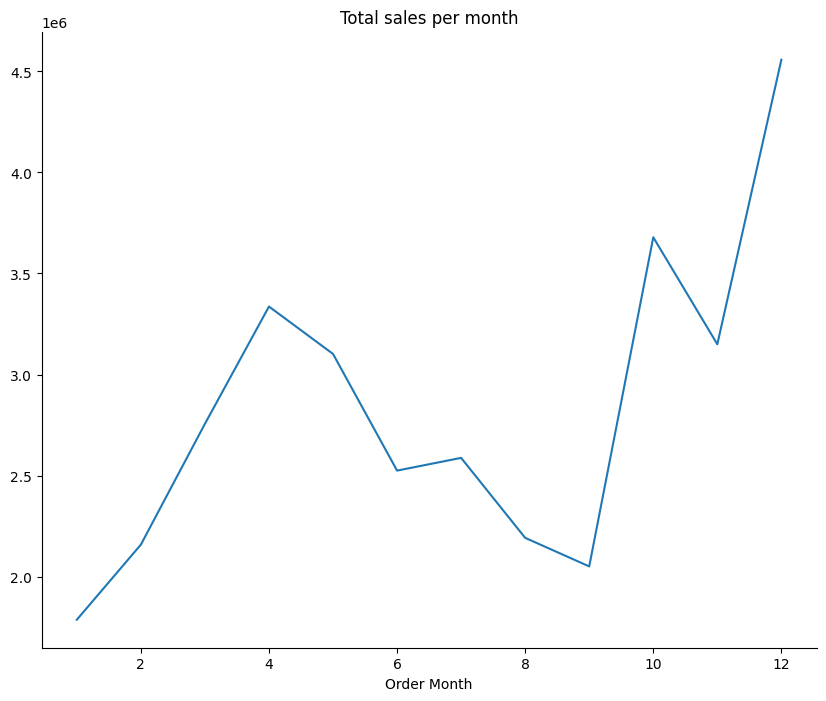

In [184]:
line_chart = grouped_data.sort_index().plot.line(
    figsize = (10,8),
    label = True,
)



line_chart.set_title('Total sales per month')
line_chart.spines['right'].set_visible(False)
line_chart.spines['top'].set_visible(False)

for i,y in enumerate(grouped_data.values):
    print(i,y)

